# **Actividad 3**

## **Punto 1:**
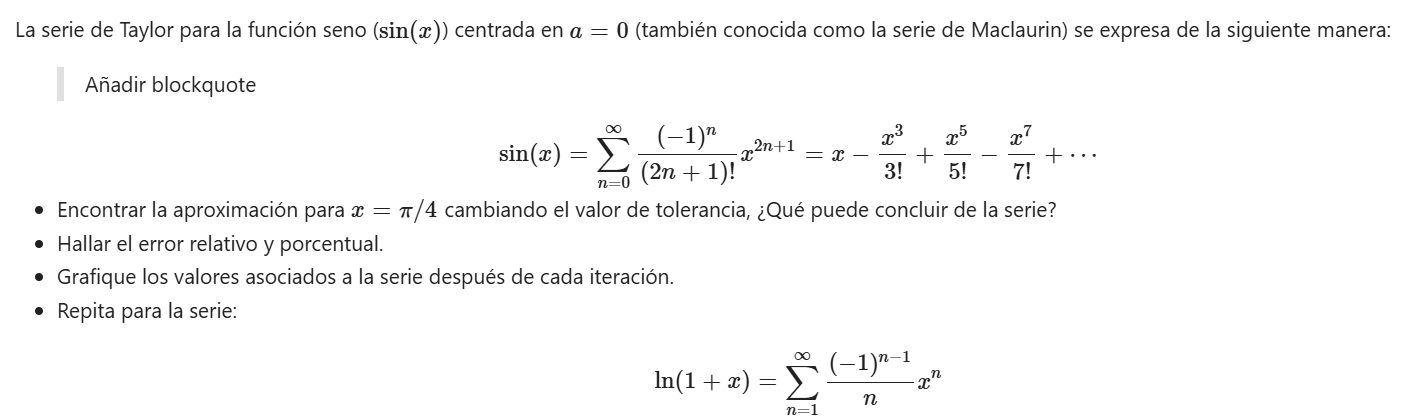


In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def factorial(n):
    """
    Se le ingresa un número n positivo al cual se le quiere determinar el factorial,
    luego regresa el factorial de dicho número.
    """
    # Inicializamos la variable producto en 1, ya que el factorial se basa en multiplicaciones sucesivas.
    producto = 1
    # Usamos un bucle for para recorrer los números desde 1 hasta n (inclusive).
    for i in range(1, n + 1):
        # Multiplicamos el valor actual de producto por el número i, acumulando la multiplicación.
        producto *= i
    # Retornamos el resultado final del factorial.
    return producto

In [7]:
def seno(x, tolerancia=1e-4, maxiter=100):
    """
    Aproxima el valor de sin(x) usando su expansión en serie de Taylor.

    Parámetros:
    ----------
    x : float
        Valor para calcular sin(x).
    tolerancia : float, opcional
        Criterio de parada basado en el error relativo (por defecto: 1e-4).
    maxiter : int, opcional
        Número máximo de iteraciones permitidas (por defecto: 100).

    Retorno:
    -------
    tuple
        (suma, error_relativo, error_porcentual)
        - suma : Aproximación de sin(x).
        - error_relativo : Diferencia relativa respecto a math.sin(x).
        - error_porcentual : Error en porcentaje.

    Excepciones:
    -----------
    ValueError:
        Si x no es un número válido.
    """

    # Inicialización de variables
    suma = 0
    sumas = []
    n = 0  # Contador de términos

    # Iteración para calcular la serie de Taylor
    for i in range(maxiter):
        termino = ((-1)**i / factorial(2*i+1)) * (x**(2*i+1))  # Calcula el término correspondiente de la serie
        suma += termino  # Suma el término a la aproximación de sin(x)
        sumas.append(suma)  # Guarda el término para graficarlo posteriormente
        n += 1

        # Verificación de convergencia según el error relativo
        if suma != 0:  # Evita división por cero
            error_relativo = abs(suma - math.sin(x)) / abs(math.sin(x))
            if error_relativo < tolerancia:
                error_porcentual = error_relativo * 100
                cantidad_terminos = [i for i in range(1, n+1)]  # Lista con la cantidad de términos usados

                # Gráfico de convergencia
                plt.figure(figsize=(10,6))
                plt.plot(cantidad_terminos, sumas, label="Términos")
                plt.legend()
                plt.xlabel("Número de términos", fontsize=15)
                plt.ylabel("Valor de términos", fontsize=15)
                plt.title("Convergencia de la Serie", fontsize=20)
                plt.ylim(-0.25, 1)
                plt.xlim(1, n)
                plt.grid()
                plt.axhline(y=math.sin(x),color="red",linestyle="--")
                plt.show()

                return suma, error_relativo, error_porcentual

    # Si la tolerancia no se cumple, definir cantidad_terminos
    cantidad_terminos = [i for i in range(1, n+1)]
    error_relativo = abs(suma - math.sin(x)) / abs(math.sin(x)) if suma != 0 else 0
    error_porcentual = error_relativo * 100

    # Gráfico final
    plt.figure(figsize=(10,6))
    plt.plot(cantidad_terminos, sumas, label="Términos")
    plt.legend()
    plt.xlabel("Número de términos", fontsize=15)
    plt.ylabel("Valor de términos", fontsize=15)
    plt.title("Convergencia de la Serie", fontsize=20)
    plt.ylim(-0.25, 1)
    plt.xlim(1, n)
    plt.axhline(y=math.sin(x),color="red",linestyle="--")
    plt.grid()
    plt.show()

    return suma, error_relativo, error_porcentual

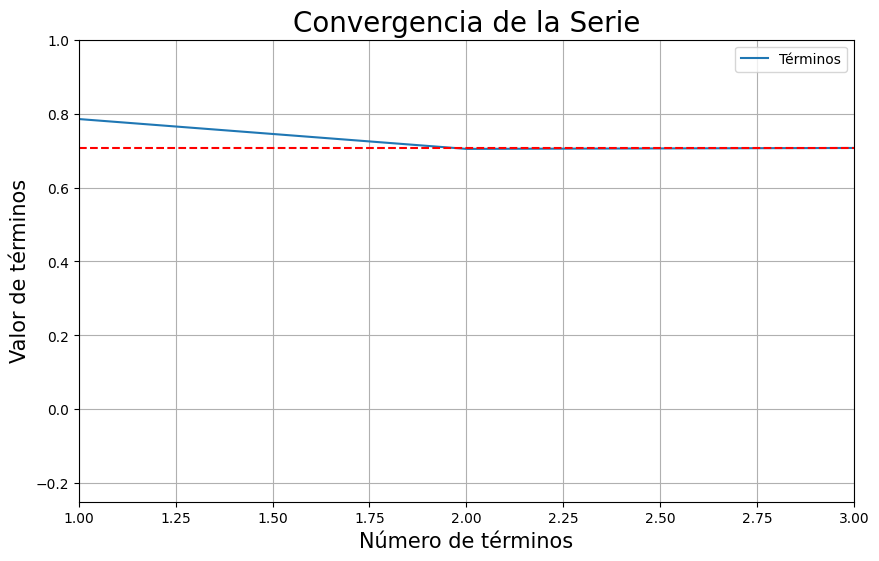

(0.7071430457793603, 5.1285878989652394e-05, 0.0051285878989652395)

In [8]:
pi=np.pi
seno((pi/4))

se realiza el cálculo para diferentes tolerancias

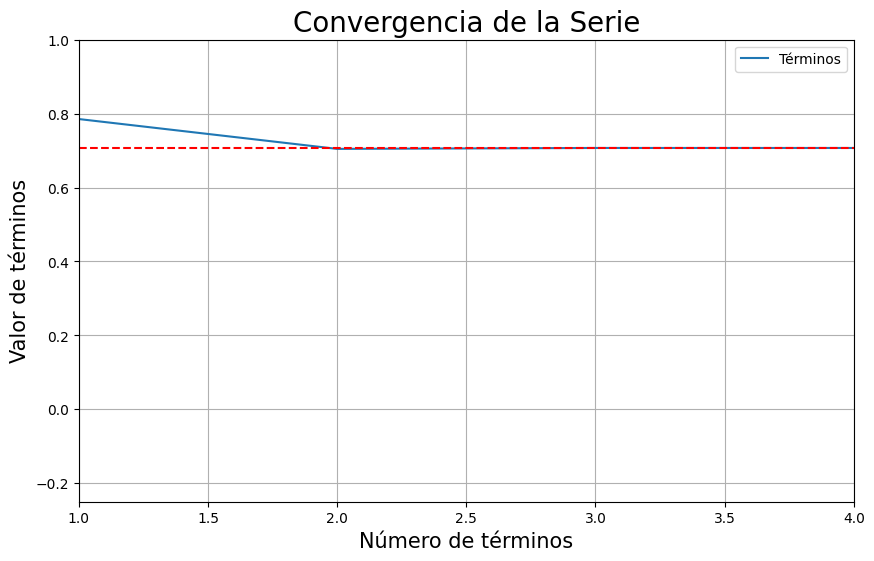

(0.7071064695751781, 4.406850249162651e-07, 4.406850249162651e-05)

In [9]:
seno(pi/4,1e-6,100)

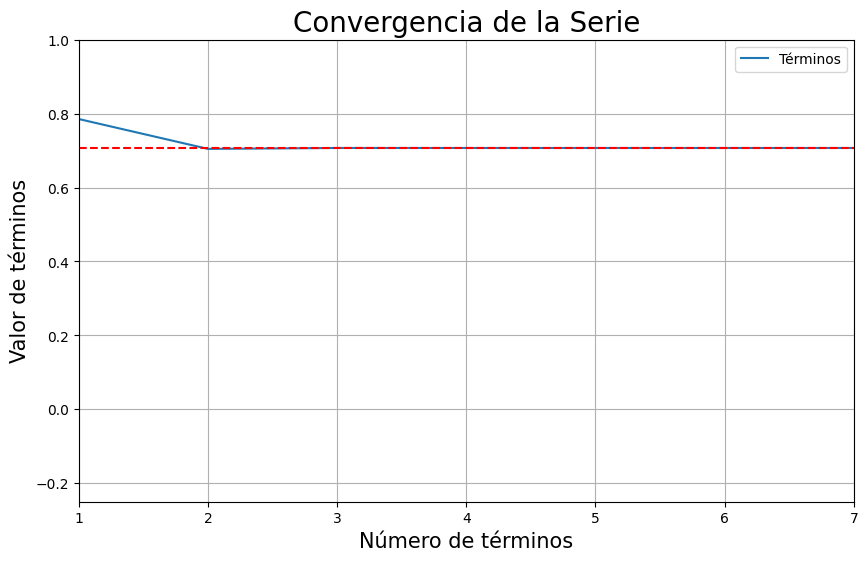

(0.7071067811865679, 2.873269199391308e-14, 2.873269199391308e-12)

In [10]:
seno(pi/4,1e-12,100)

En conclusión, la serie Taylor asociada converge muy rapidamente, lo que asegura que con pocos términos se tenga una buena precisión.

In [14]:
def logaritmo_natural(x, tolerancia=1e-4, maxiter=100):
    """
    Calcula la aproximación de ln(1 + x) usando su expansión en serie de Taylor.

    Parámetros:
    ----------
    x : float
        Valor para calcular ln(1 + x). Debe estar en el intervalo (0,1].
    tolerancia : float, opcional
        Criterio de parada basado en el error relativo (por defecto: 1e-4).
    maxiter : int, opcional
        Número máximo de iteraciones permitidas (por defecto: 100).

    Retorno:
    -------
    tuple
        (suma, error_relativo, error_porcentual)
        - suma : Aproximación de ln(1 + x).
        - error_relativo : Diferencia relativa respecto a np.log(1 + x).
        - error_porcentual : Error en porcentaje.
        - "máximo de iteraciones alcanzadas" si no se cumple la tolerancia.

    Excepciones:
    -----------
    ValueError:
        Si x está fuera del intervalo de convergencia (0,1].
    """

    # Validación del intervalo de convergencia
    if x <= 0 or x > 1:
        raise ValueError("El número ingresado está fuera del intervalo de convergencia de la serie")

    # Inicialización de variables
    suma = 0
    sumas=[]
    n = 0  # Contador de términos

    # Iteración para calcular la serie
    for i in range(1, maxiter + 1):
        termino = ((-1)**(i-1) / i) * (x**i)
        suma += termino
        sumas.append(suma)
        n += 1

        # Verificación de convergencia según el error relativo
        if suma != 0:  # Evita división por cero
            error_relativo = abs(suma - np.log(1 + x)) / abs(np.log(1+x))
            if error_relativo < tolerancia:
                error_porcentual = error_relativo * 100
                cantidad_terminos = [i for i in range(1, n + 1)]  # Lista de número de términos usados

                # Gráfico de convergencia
                plt.figure(figsize=(10,6))
                plt.plot(cantidad_terminos, sumas, label="Términos")
                plt.xlabel("Número de términos", fontsize=15)
                plt.ylabel("Valor de términos", fontsize=15)
                plt.title("Convergencia de la Serie", fontsize=20)
                plt.xlim(1, n)
                plt.axhline(y=(math.log(1+x)), color="red", linestyle="--",label="Valor Real")
                plt.grid()
                plt.legend()
                plt.show()

                return suma, error_relativo, error_porcentual,n
    error_relativo=abs(suma-np.log(1+x))/abs(np.log(1+x))
    error_porcentual=error_relativo*100
    cantidad_terminos = [i for i in range(1, n + 1)]
    plt.figure(figsize=(10,6))
    plt.plot(cantidad_terminos, sumas, label="Términos")
    plt.xlabel("Número de términos", fontsize=15)
    plt.ylabel("Valor de términos", fontsize=15)
    plt.title("Convergencia de la Serie", fontsize=20)
    plt.xlim(1, n)
    plt.axhline(y=math.log(1+x), color="red", linestyle="--",label="Valor Real")
    plt.grid()
    plt.legend()
    plt.xscale("log")
    plt.show()
    return suma, error_relativo, error_porcentual,n

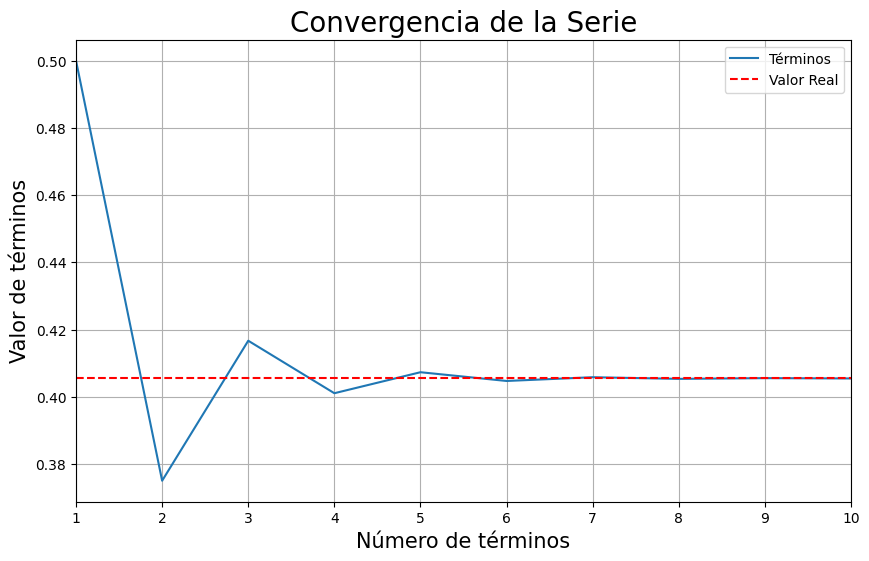

(0.4054346478174603,
 np.float64(7.51243204284697e-05),
 np.float64(0.007512432042846969),
 10)

In [15]:
logaritmo_natural(0.5)

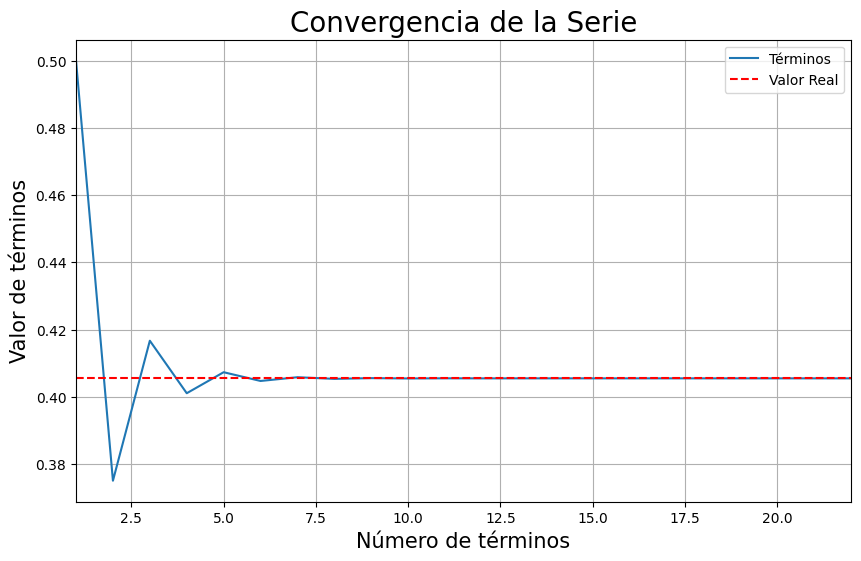

(0.40546510460350027,
 np.float64(8.643565239991545e-09),
 np.float64(8.643565239991545e-07),
 22)

In [16]:
logaritmo_natural(0.5,1e-8,100000)

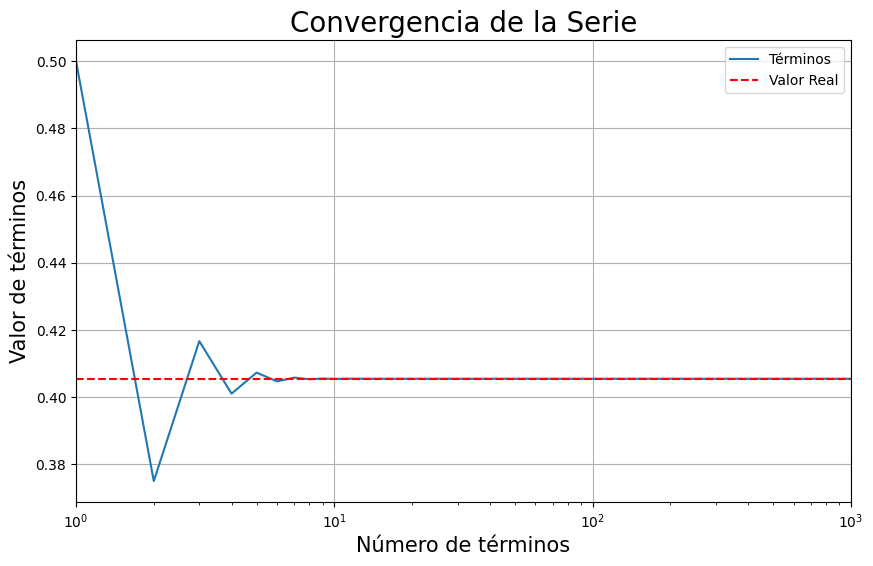

(0.4054651081081643,
 np.float64(2.738146889643058e-16),
 np.float64(2.738146889643058e-14),
 1000)

In [17]:
logaritmo_natural(0.5,1e-18,1000)

Sí bien esta serie converge no tan lento como otras, igualmente, si la comparamos con seno o coseno, converge mucho más lentamente que estas dos últimas, igualmente, al aumentar x, esta tiende a tardarse más en converger

## **Punto 2:**
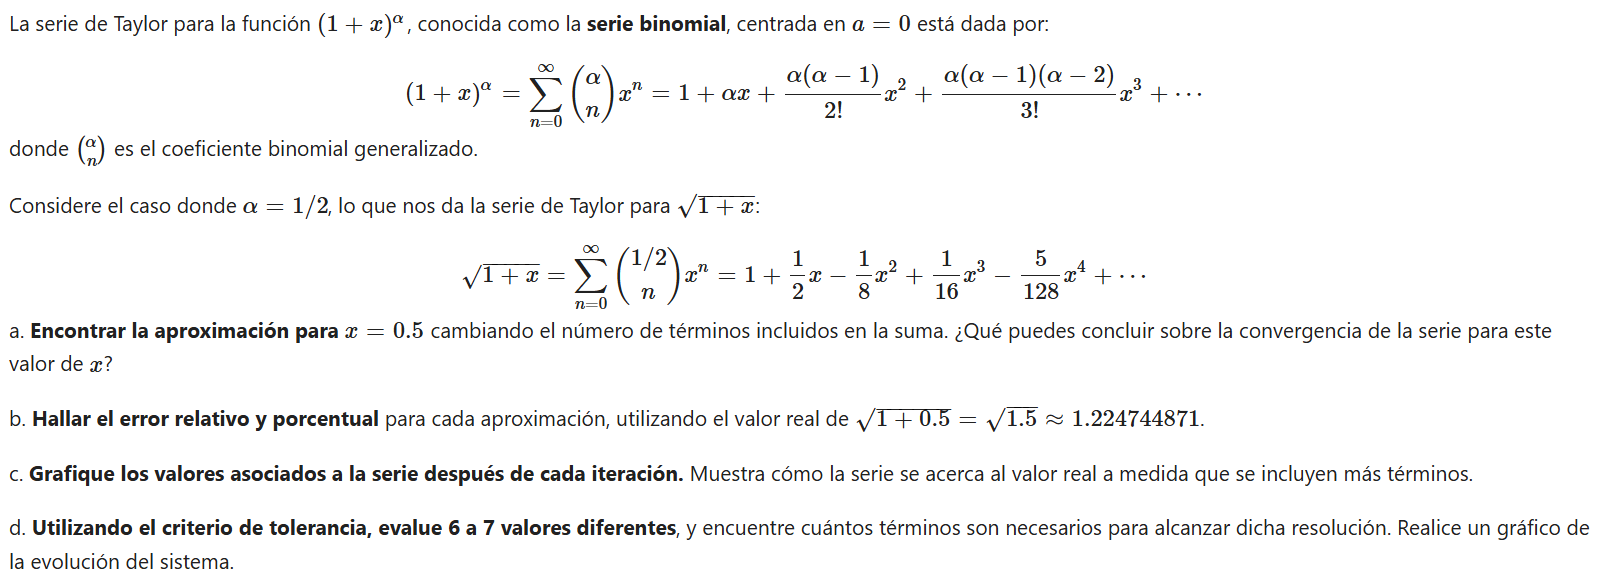

In [18]:
def terminos_serie_binomial(n,alpha):
  if n==0:
    return 1
  termino=1
  for i in range(n):
    termino*=(alpha-i)
  return termino

In [19]:
import matplotlib.pyplot as plt  # Importamos matplotlib para graficar

def serie_binomial(x, alpha, tolerancia=1e-4, maxiter=1000):
    """
    Calcula la aproximación de la serie binomial para (1 + x)**alpha usando términos de una serie de Taylor.

    Parámetros:
    x: Valor de entrada en la serie.
    alpha: Exponente en la expansión binomial.
    tolerancia: Criterio de parada basado en la precisión relativa.
    maxiter: Número máximo de iteraciones.

    Retorna:
    suma: Aproximación de la serie.
    error_relativo: Diferencia relativa con el valor real.
    error_porcentual: Error relativo en porcentaje.
    n: Número de términos utilizados.
    """

    suma = 0  # Inicializamos la suma de la serie
    n = 0  # Contador de términos
    cantidad_terminos = []  # Lista para almacenar el número de términos usados
    sumas = []  # Lista para almacenar el valor acumulado de la serie

    # Iteramos hasta alcanzar maxiter términos
    for i in range(maxiter):
        # Calculamos el término i usando la función personalizada terminos_serie_binomial
        termino = (terminos_serie_binomial(i, alpha=alpha) / factorial(i)) * (x**(i))

        suma += termino  # Sumamos el término a la aproximación de la serie
        n += 1  # Incrementamos el número de términos
        sumas.append(suma)  # Guardamos el valor actual de la serie

        # Condición de parada basada en tolerancia
        if abs(termino / suma) < tolerancia:
            error_relativo = abs((1 + x)**(alpha) - suma) / suma  # Calculamos el error relativo
            error_porcentual = error_relativo * 100  # Convertimos el error relativo a porcentaje

            # Generamos la lista de cantidad de términos
            cantidad_terminos = [i for i in range(1, n + 1)]

            # Graficamos la convergencia
            plt.figure(figsize=(10,6))
            plt.plot(cantidad_terminos, sumas, label="Términos")  # Se grafican los valores acumulados
            plt.xlabel("Número de términos", fontsize=15)
            plt.ylabel("Valor de términos", fontsize=15)
            plt.title("Convergencia de la Serie", fontsize=20)
            plt.xlim(1, n)  # Se ajusta el eje x
            plt.axhline(y=(1 + x)**(alpha), color="red", linestyle="--", label="Valor Real")  # Línea del valor real
            plt.grid()
            plt.legend()
            plt.show()

            return suma, error_relativo, error_porcentual, n  # Retorna los valores obtenidos

    # Si no se cumple el criterio de parada, calculamos el error final
    error_relativo = abs((1 + x)**(alpha) - suma) / suma
    error_porcentual = error_relativo * 100
    cantidad_terminos = [i for i in range(1, n + 1)]

    # Graficamos la convergencia en caso de que el bucle llegue a maxiter sin cumplir la tolerancia
    plt.figure(figsize=(10,6))
    plt.plot(cantidad_terminos, sumas, label="Términos")
    plt.xlabel("Número de términos", fontsize=15)
    plt.ylabel("Valor de términos", fontsize=15)
    plt.title("Convergencia de la Serie", fontsize=20)
    plt.xlim(1, n)
    plt.axhline(y=(1 + x)**(alpha), color="red", linestyle="--", label="Valor Real")
    plt.grid()
    plt.legend()
    plt.show()

    return suma, error_relativo, error_porcentual, n  # Retornamos los resultados finales

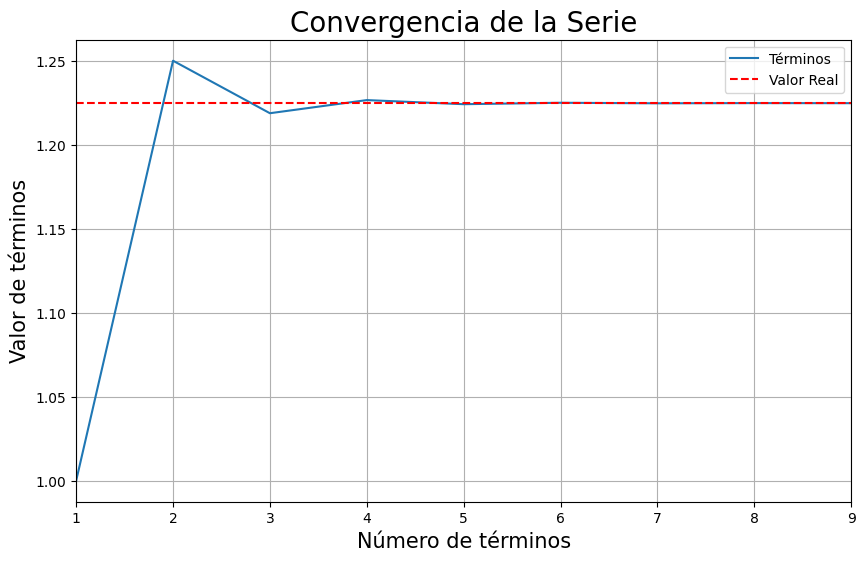

In [20]:
suma1,error_relativo, error_porcentual, n1=serie_binomial(0.5,0.5)

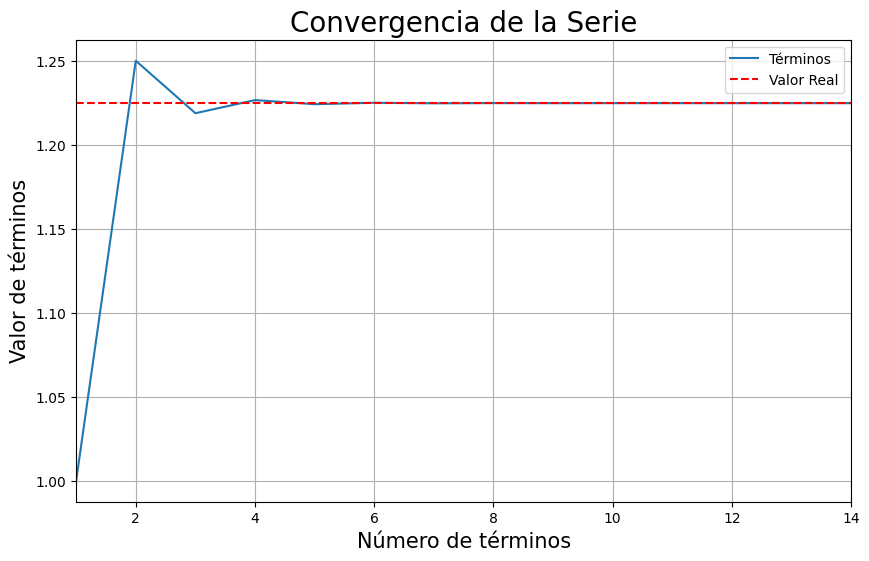

In [21]:
suma2,error_relativo2, error_porcentual2, n2=serie_binomial(0.5,0.5,1e-6,1000)

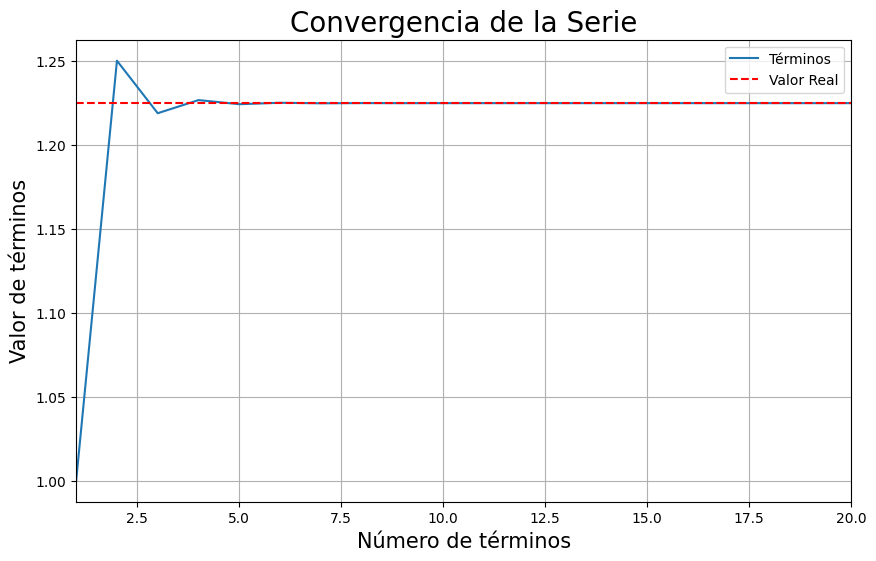

In [22]:
suma3,error_relativo3, error_porcentual3, n3=serie_binomial(0.5,0.5,1e-8,1000)

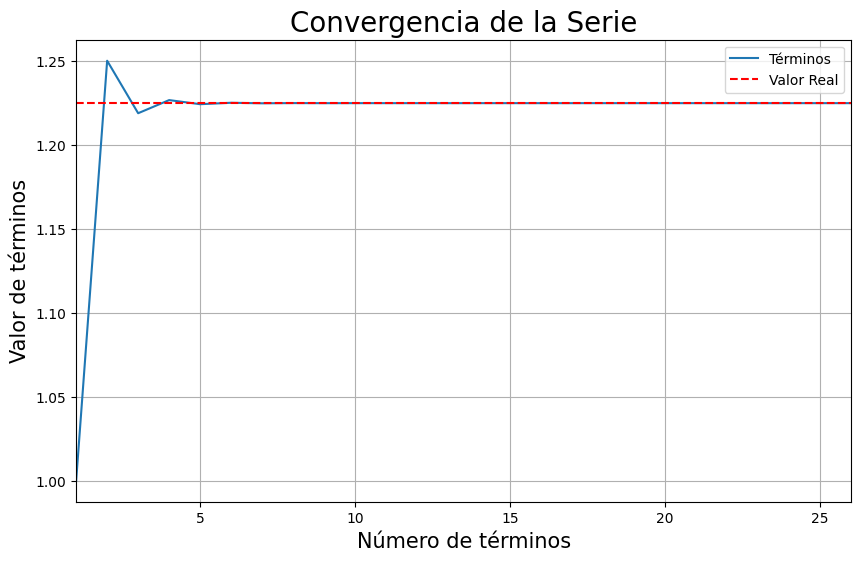

In [23]:
suma4,error_relativo4, error_porcentual4, n4=serie_binomial(0.5,0.5,1e-10,1000)

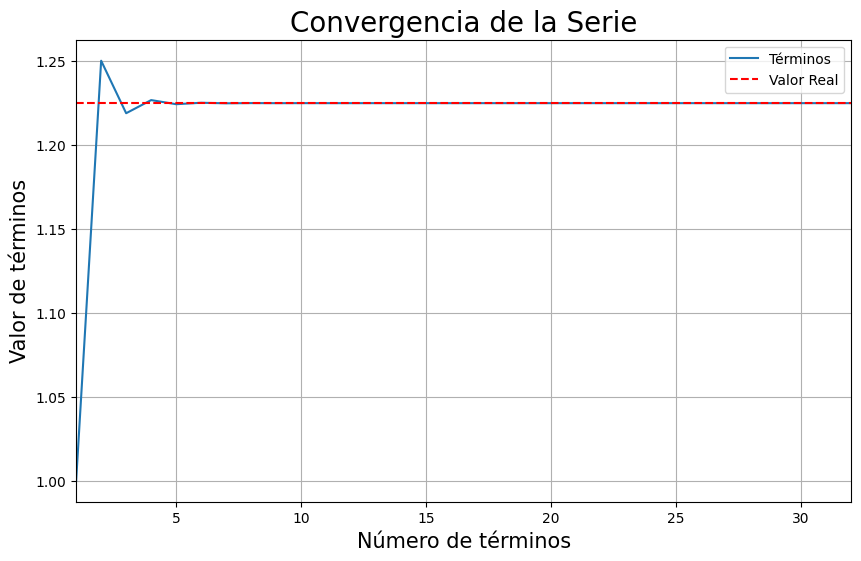

In [24]:
suma5,error_relativo5, error_porcentual5, n5=serie_binomial(0.5,0.5,1e-12,1000)

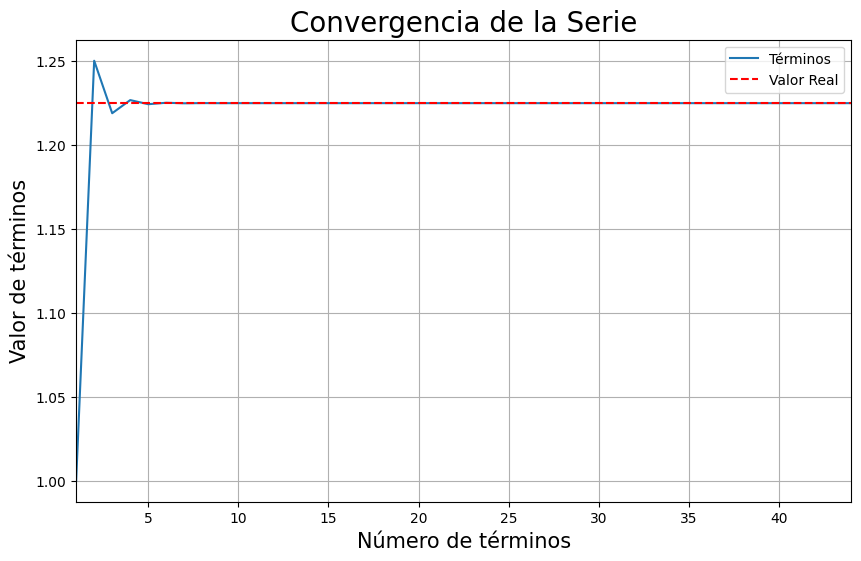

In [25]:
suma6,error_relativo6, error_porcentual6, n6=serie_binomial(0.5,0.5,1e-16,1000)